In [1]:
%matplotlib notebook

from modsim import *

In [2]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [3]:
#mass of person
mass = 62.1422 * kg

In [4]:
#constants
g = 9.81 * m/s**2
k_trampoline = 200 * kg/s**2

In [5]:
#starting conditions
init = State(y = 0 * m,
             v = 3 * m/s)

In [6]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [7]:
system = System(init=init, g=g, ts=ts)

In [8]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [9]:
slope_func(init, 0 , system)

(<Quantity(3.0, 'meter / second')>, <Quantity(-9.81, 'meter / second ** 2')>)

In [10]:
run_odeint(system, slope_func)

In [11]:
def plot_position(results):
    newfig()
    plot(results.y, label = 'y')
    
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)')

<IPython.core.display.Javascript object>


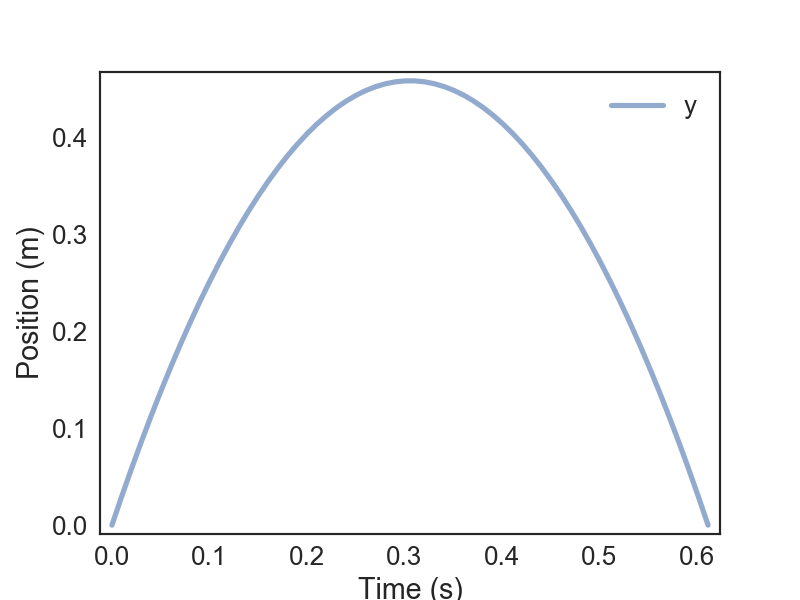

In [12]:
plot_position(system.results)

In [13]:
d = 0.45859872611464 * m

In [14]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

<Quantity(929.0760656971511, 'kilogram * meter ** 2 / second ** 2')>

In [15]:
k = 2 * kg/s**2

In [16]:
#legs
x = .2 * m
leg_PE = 1/2 * k * x**2

In [17]:
Total_PE = tramp_PE + leg_PE

In [18]:
v_up = sqrt(2 * Total_PE / mass)

In [19]:
init_up = State(y = 0 *m,
                v = v_up)

In [20]:
duration_up = v_up/g/s + duration

In [21]:
ts_up = linrange(duration, duration_up, .01)

In [31]:
system_up = System(init=init_up, g=g, ts=ts_up)

In [32]:
slope_func(init_up, 0, system_up)

(<Quantity(5.468236906636362, 'meter / second')>,
 <Quantity(-9.81, 'meter / second ** 2')>)

In [33]:
run_odeint(system_up, slope_func)

<IPython.core.display.Javascript object>


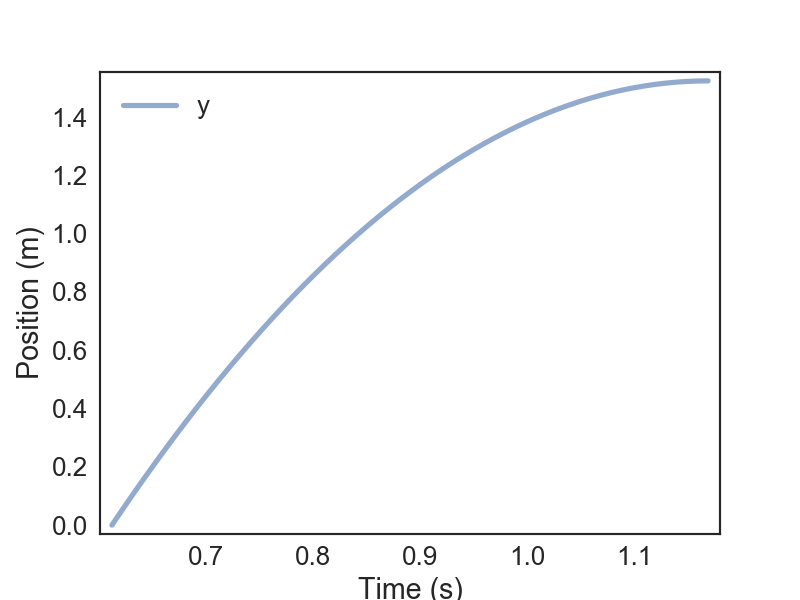

In [34]:
plot_position(system_up.results)

<IPython.core.display.Javascript object>


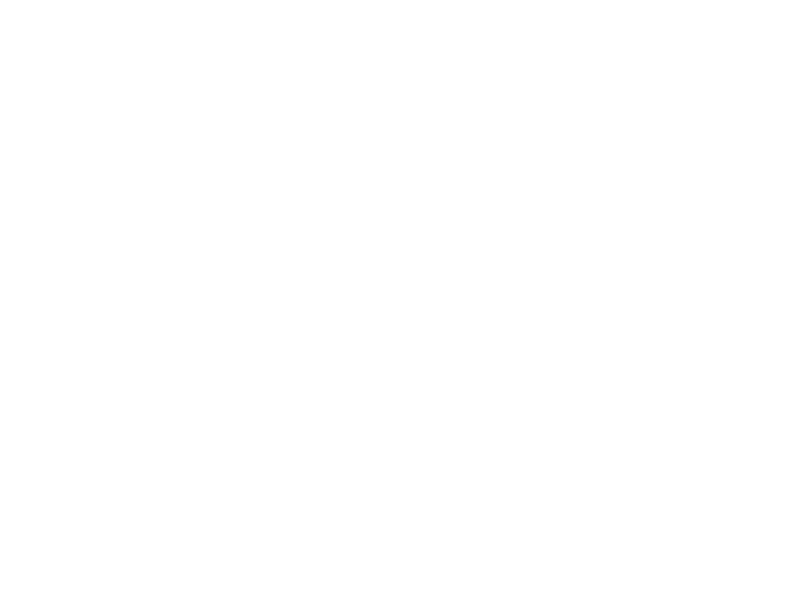

<IPython.core.display.Javascript object>


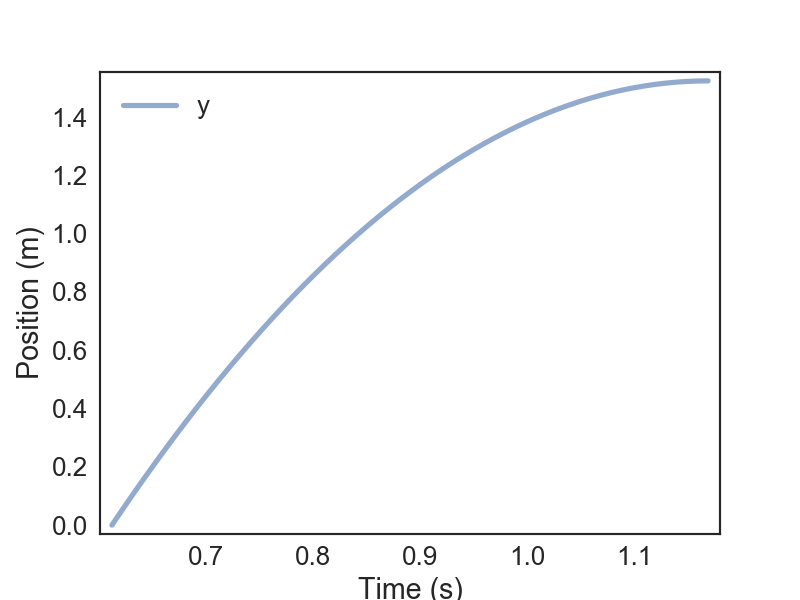

0.0 kilogram / second ** 2                  y             v
0.611621  0.000000  5.468237e+00
0.621575  0.053944  5.370590e+00
0.631528  0.106916  5.272943e+00
0.641482  0.158916  5.175296e+00
0.651436  0.209944  5.077649e+00
0.661390  0.260000  4.980001e+00
0.671344  0.309084  4.882354e+00
0.681298  0.357196  4.784707e+00
0.691251  0.404336  4.687060e+00
0.701205  0.450505  4.589413e+00
0.711159  0.495701  4.491766e+00
0.721113  0.539925  4.394119e+00
0.731067  0.583178  4.296472e+00
0.741021  0.625458  4.198825e+00
0.750974  0.666766  4.101178e+00
0.760928  0.707103  4.003531e+00
0.770882  0.746467  3.905884e+00
0.780836  0.784860  3.808236e+00
0.790790  0.822280  3.710589e+00
0.800744  0.858729  3.612942e+00
0.810697  0.894206  3.515295e+00
0.820651  0.928710  3.417648e+00
0.830605  0.962243  3.320001e+00
0.840559  0.994804  3.222354e+00
0.850513  1.026393  3.124707e+00
0.860467  1.057009  3.027060e+00
0.870420  1.086654  2.929413e+00
0.880374  1.115327  2.831766e+00
0.890328  1.1430

<IPython.core.display.Javascript object>


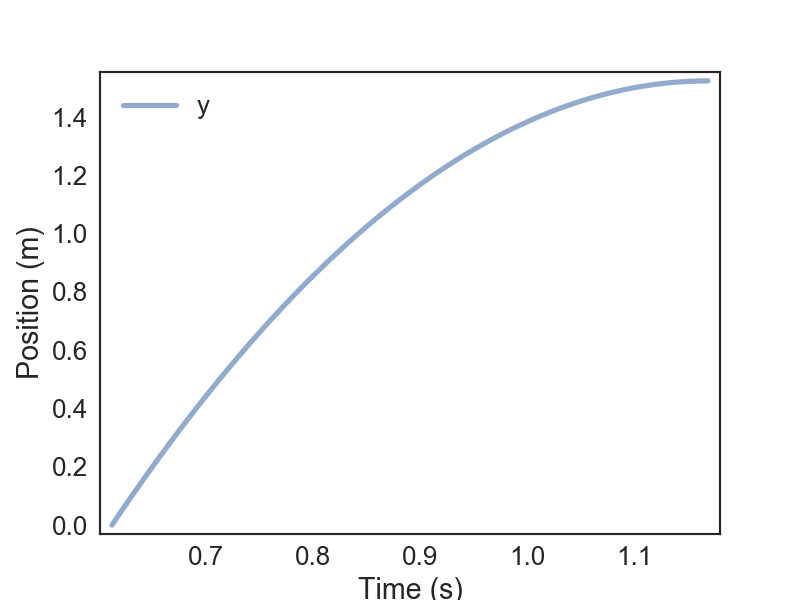

0.1 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468243
0.621575  0.053944  5.370596
0.631528  0.106916  5.272949
0.641482  0.158916  5.175302
0.651436  0.209944  5.077654
0.661390  0.260000  4.980007
0.671344  0.309084  4.882360
0.681298  0.357197  4.784713
0.691251  0.404337  4.687066
0.701205  0.450505  4.589419
0.711159  0.495702  4.491772
0.721113  0.539926  4.394125
0.731067  0.583178  4.296478
0.741021  0.625459  4.198831
0.750974  0.666767  4.101184
0.760928  0.707104  4.003536
0.770882  0.746468  3.905889
0.780836  0.784861  3.808242
0.790790  0.822281  3.710595
0.800744  0.858730  3.612948
0.810697  0.894207  3.515301
0.820651  0.928712  3.417654
0.830605  0.962244  3.320007
0.840559  0.994805  3.222360
0.850513  1.026394  3.124713
0.860467  1.057011  3.027066
0.870420  1.086656  2.929419
0.880374  1.115329  2.831771
0.890328  1.143030  2.734124
0.900282  1.169759  2.636477
0.910236  1.195516  2.538830
0.920190  1.220301  2.441183
0.930143  1.2441

<IPython.core.display.Javascript object>


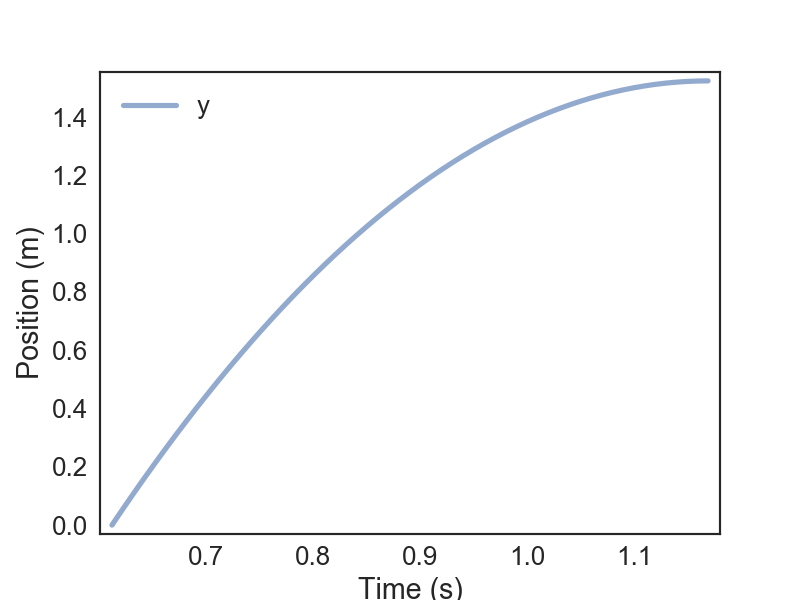

0.2 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468249
0.621575  0.053944  5.370602
0.631528  0.106916  5.272955
0.641482  0.158916  5.175307
0.651436  0.209944  5.077660
0.661390  0.260001  4.980013
0.671344  0.309085  4.882366
0.681298  0.357197  4.784719
0.691251  0.404337  4.687072
0.701205  0.450506  4.589425
0.711159  0.495702  4.491778
0.721113  0.539927  4.394131
0.731067  0.583179  4.296484
0.741021  0.625459  4.198837
0.750974  0.666768  4.101189
0.760928  0.707105  4.003542
0.770882  0.746469  3.905895
0.780836  0.784862  3.808248
0.790790  0.822283  3.710601
0.800744  0.858731  3.612954
0.810697  0.894208  3.515307
0.820651  0.928713  3.417660
0.830605  0.962246  3.320013
0.840559  0.994806  3.222366
0.850513  1.026395  3.124719
0.860467  1.057012  3.027071
0.870420  1.086657  2.929424
0.880374  1.115330  2.831777
0.890328  1.143031  2.734130
0.900282  1.169760  2.636483
0.910236  1.195518  2.538836
0.920190  1.220303  2.441189
0.930143  1.2441

<IPython.core.display.Javascript object>


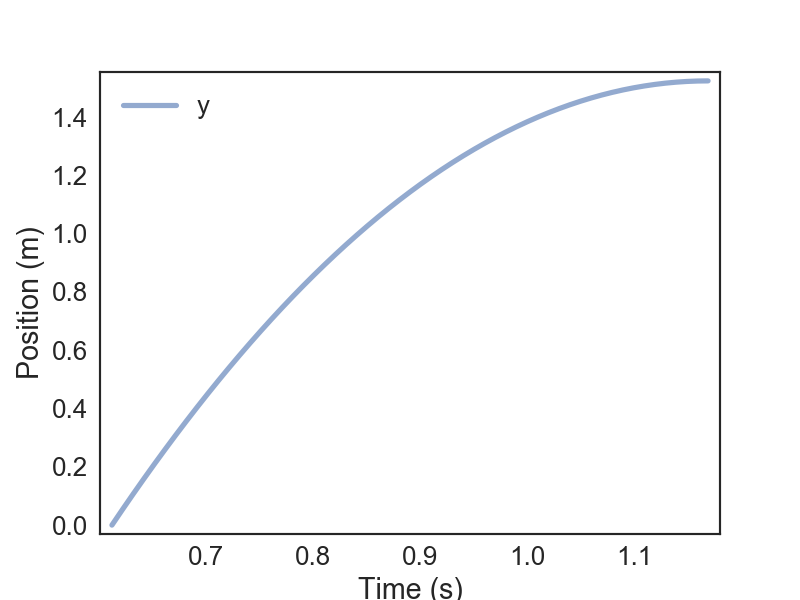

0.30000000000000004 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468255
0.621575  0.053944  5.370607
0.631528  0.106916  5.272960
0.641482  0.158916  5.175313
0.651436  0.209945  5.077666
0.661390  0.260001  4.980019
0.671344  0.309085  4.882372
0.681298  0.357198  4.784725
0.691251  0.404338  4.687078
0.701205  0.450506  4.589431
0.711159  0.495703  4.491784
0.721113  0.539927  4.394137
0.731067  0.583180  4.296490
0.741021  0.625460  4.198842
0.750974  0.666769  4.101195
0.760928  0.707105  4.003548
0.770882  0.746470  3.905901
0.780836  0.784863  3.808254
0.790790  0.822284  3.710607
0.800744  0.858732  3.612960
0.810697  0.894209  3.515313
0.820651  0.928714  3.417666
0.830605  0.962247  3.320019
0.840559  0.994808  3.222372
0.850513  1.026397  3.124724
0.860467  1.057014  3.027077
0.870420  1.086659  2.929430
0.880374  1.115332  2.831783
0.890328  1.143033  2.734136
0.900282  1.169762  2.636489
0.910236  1.195519  2.538842
0.920190  1.220305  2.441195


<IPython.core.display.Javascript object>


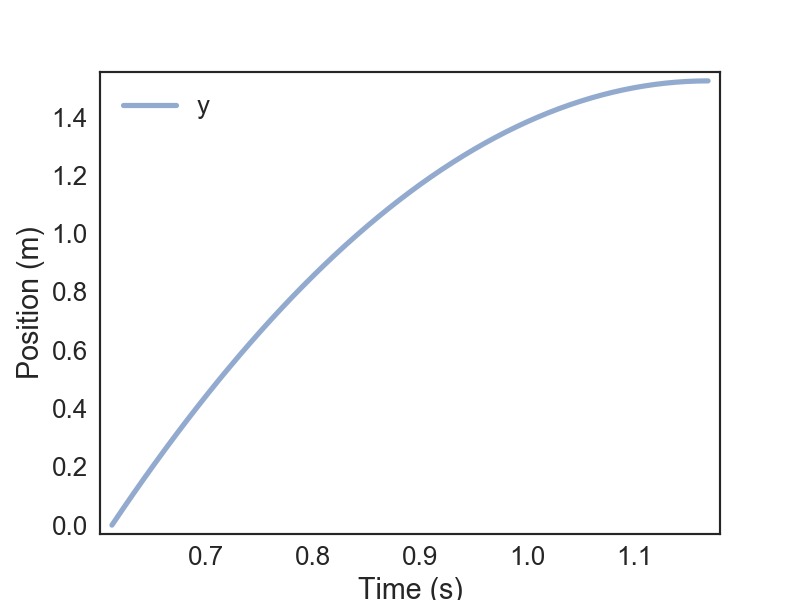

0.4 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468260
0.621575  0.053944  5.370613
0.631528  0.106916  5.272966
0.641482  0.158917  5.175319
0.651436  0.209945  5.077672
0.661390  0.260001  4.980025
0.671344  0.309086  4.882378
0.681298  0.357198  4.784731
0.691251  0.404338  4.687084
0.701205  0.450507  4.589437
0.711159  0.495703  4.491790
0.721113  0.539928  4.394142
0.731067  0.583180  4.296495
0.741021  0.625461  4.198848
0.750974  0.666770  4.101201
0.760928  0.707106  4.003554
0.770882  0.746471  3.905907
0.780836  0.784864  3.808260
0.790790  0.822285  3.710613
0.800744  0.858733  3.612966
0.810697  0.894210  3.515319
0.820651  0.928715  3.417672
0.830605  0.962248  3.320025
0.840559  0.994809  3.222377
0.850513  1.026398  3.124730
0.860467  1.057015  3.027083
0.870420  1.086660  2.929436
0.880374  1.115333  2.831789
0.890328  1.143035  2.734142
0.900282  1.169764  2.636495
0.910236  1.195521  2.538848
0.920190  1.220306  2.441201
0.930143  1.2441

<IPython.core.display.Javascript object>


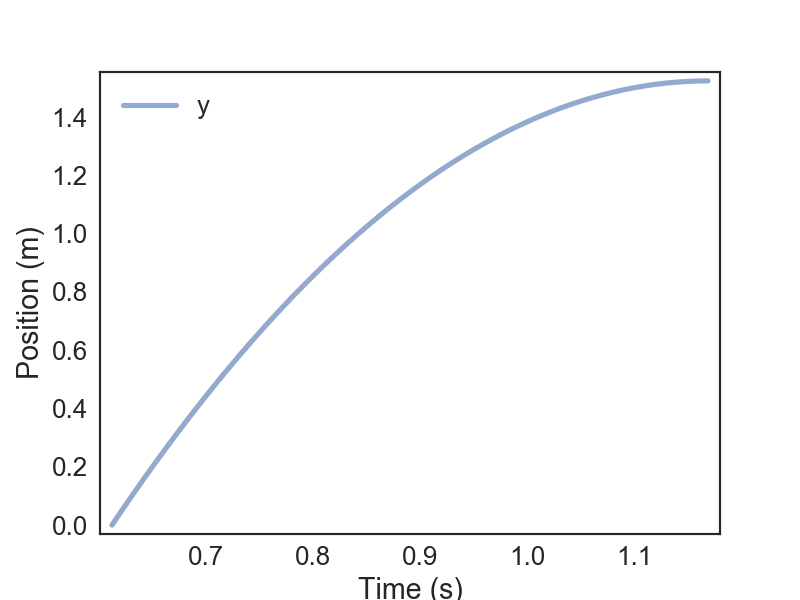

0.5 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468266
0.621575  0.053944  5.370619
0.631528  0.106916  5.272972
0.641482  0.158917  5.175325
0.651436  0.209945  5.077678
0.661390  0.260001  4.980031
0.671344  0.309086  4.882384
0.681298  0.357198  4.784737
0.691251  0.404339  4.687090
0.701205  0.450507  4.589443
0.711159  0.495704  4.491795
0.721113  0.539928  4.394148
0.731067  0.583181  4.296501
0.741021  0.625462  4.198854
0.750974  0.666770  4.101207
0.760928  0.707107  4.003560
0.770882  0.746472  3.905913
0.780836  0.784865  3.808266
0.790790  0.822286  3.710619
0.800744  0.858735  3.612972
0.810697  0.894212  3.515325
0.820651  0.928716  3.417677
0.830605  0.962249  3.320030
0.840559  0.994811  3.222383
0.850513  1.026400  3.124736
0.860467  1.057017  3.027089
0.870420  1.086662  2.929442
0.880374  1.115335  2.831795
0.890328  1.143036  2.734148
0.900282  1.169766  2.636501
0.910236  1.195523  2.538854
0.920190  1.220308  2.441207
0.930143  1.2441

<IPython.core.display.Javascript object>


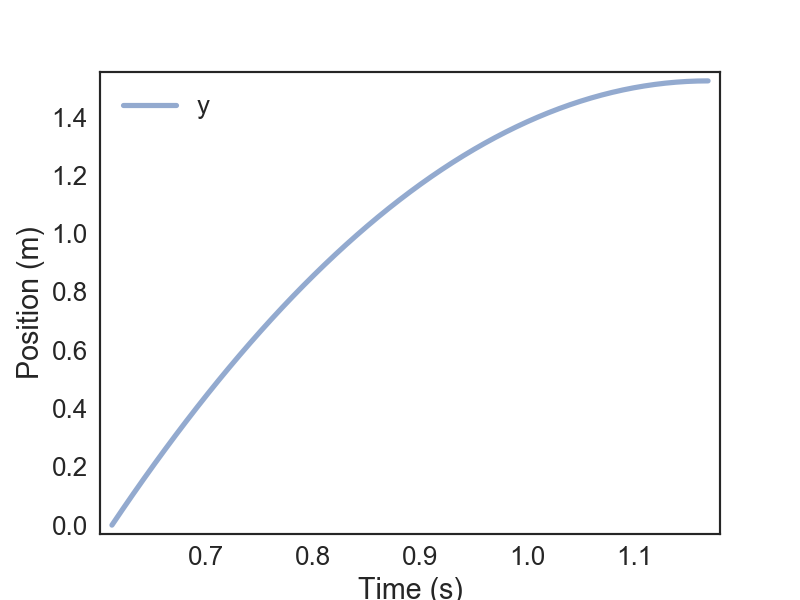

0.6000000000000001 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468272
0.621575  0.053944  5.370625
0.631528  0.106917  5.272978
0.641482  0.158917  5.175331
0.651436  0.209945  5.077684
0.661390  0.260002  4.980037
0.671344  0.309086  4.882390
0.681298  0.357199  4.784743
0.691251  0.404339  4.687096
0.701205  0.450508  4.589448
0.711159  0.495704  4.491801
0.721113  0.539929  4.394154
0.731067  0.583182  4.296507
0.741021  0.625463  4.198860
0.750974  0.666771  4.101213
0.760928  0.707108  4.003566
0.770882  0.746473  3.905919
0.780836  0.784866  3.808272
0.790790  0.822287  3.710625
0.800744  0.858736  3.612978
0.810697  0.894213  3.515330
0.820651  0.928718  3.417683
0.830605  0.962251  3.320036
0.840559  0.994812  3.222389
0.850513  1.026401  3.124742
0.860467  1.057018  3.027095
0.870420  1.086663  2.929448
0.880374  1.115337  2.831801
0.890328  1.143038  2.734154
0.900282  1.169767  2.636507
0.910236  1.195525  2.538860
0.920190  1.220310  2.441213
0

<IPython.core.display.Javascript object>


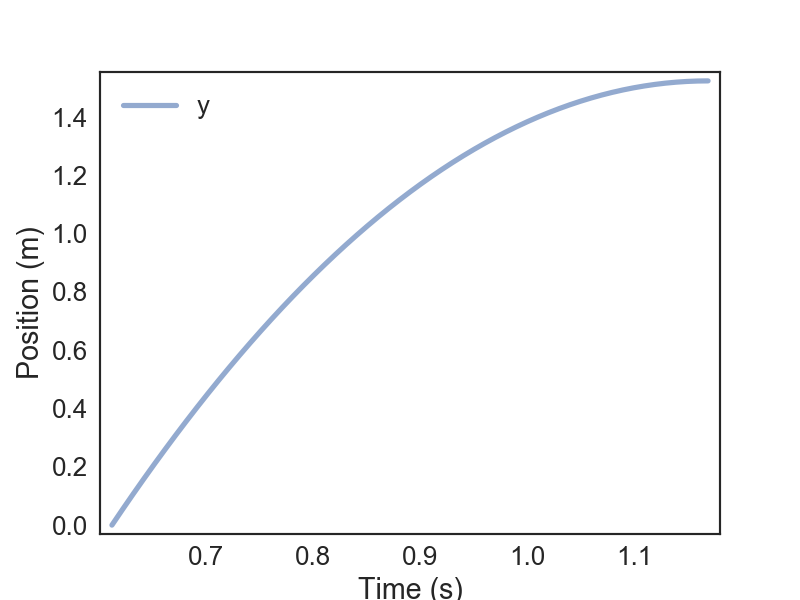

0.7000000000000001 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468278
0.621575  0.053944  5.370631
0.631528  0.106917  5.272984
0.641482  0.158917  5.175337
0.651436  0.209946  5.077690
0.661390  0.260002  4.980043
0.671344  0.309087  4.882396
0.681298  0.357199  4.784748
0.691251  0.404340  4.687101
0.701205  0.450508  4.589454
0.711159  0.495705  4.491807
0.721113  0.539930  4.394160
0.731067  0.583183  4.296513
0.741021  0.625463  4.198866
0.750974  0.666772  4.101219
0.760928  0.707109  4.003572
0.770882  0.746474  3.905925
0.780836  0.784867  3.808278
0.790790  0.822288  3.710631
0.800744  0.858737  3.612983
0.810697  0.894214  3.515336
0.820651  0.928719  3.417689
0.830605  0.962252  3.320042
0.840559  0.994813  3.222395
0.850513  1.026402  3.124748
0.860467  1.057020  3.027101
0.870420  1.086665  2.929454
0.880374  1.115338  2.831807
0.890328  1.143040  2.734160
0.900282  1.169769  2.636513
0.910236  1.195526  2.538865
0.920190  1.220312  2.441218
0

<IPython.core.display.Javascript object>


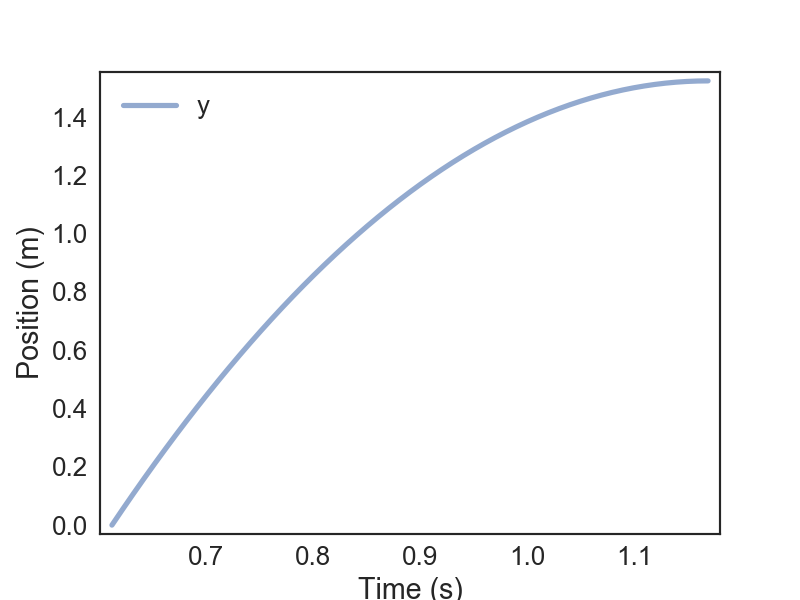

0.8 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468284
0.621575  0.053944  5.370637
0.631528  0.106917  5.272990
0.641482  0.158917  5.175343
0.651436  0.209946  5.077696
0.661390  0.260002  4.980049
0.671344  0.309087  4.882401
0.681298  0.357200  4.784754
0.691251  0.404340  4.687107
0.701205  0.450509  4.589460
0.711159  0.495706  4.491813
0.721113  0.539930  4.394166
0.731067  0.583183  4.296519
0.741021  0.625464  4.198872
0.750974  0.666773  4.101225
0.760928  0.707110  4.003578
0.770882  0.746475  3.905931
0.780836  0.784868  3.808284
0.790790  0.822289  3.710636
0.800744  0.858738  3.612989
0.810697  0.894215  3.515342
0.820651  0.928720  3.417695
0.830605  0.962253  3.320048
0.840559  0.994815  3.222401
0.850513  1.026404  3.124754
0.860467  1.057021  3.027107
0.870420  1.086666  2.929460
0.880374  1.115340  2.831813
0.890328  1.143041  2.734166
0.900282  1.169771  2.636518
0.910236  1.195528  2.538871
0.920190  1.220314  2.441224
0.930143  1.2441

<IPython.core.display.Javascript object>


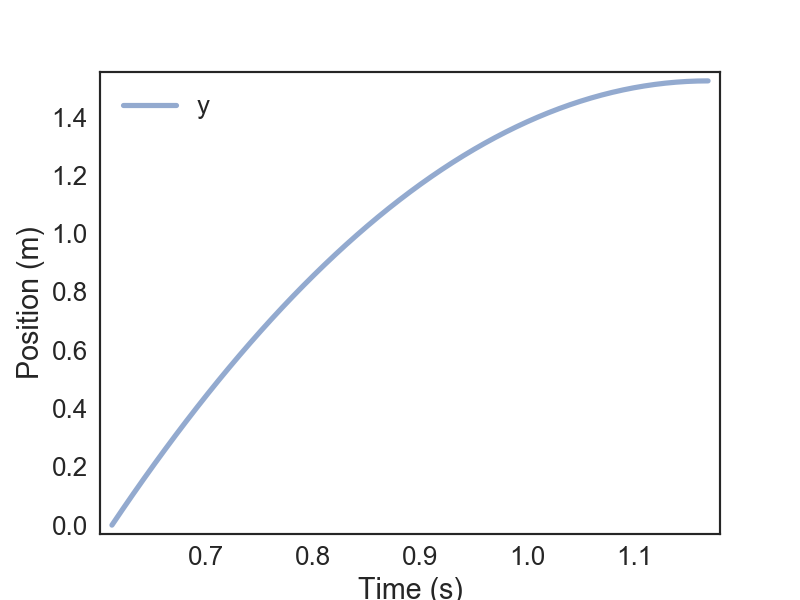

0.9 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468290
0.621575  0.053944  5.370643
0.631528  0.106917  5.272996
0.641482  0.158917  5.175349
0.651436  0.209946  5.077702
0.661390  0.260003  4.980054
0.671344  0.309087  4.882407
0.681298  0.357200  4.784760
0.691251  0.404341  4.687113
0.701205  0.450509  4.589466
0.711159  0.495706  4.491819
0.721113  0.539931  4.394172
0.731067  0.583184  4.296525
0.741021  0.625465  4.198878
0.750974  0.666774  4.101231
0.760928  0.707111  4.003584
0.770882  0.746476  3.905936
0.780836  0.784869  3.808289
0.790790  0.822290  3.710642
0.800744  0.858739  3.612995
0.810697  0.894216  3.515348
0.820651  0.928721  3.417701
0.830605  0.962255  3.320054
0.840559  0.994816  3.222407
0.850513  1.026405  3.124760
0.860467  1.057023  3.027113
0.870420  1.086668  2.929466
0.880374  1.115341  2.831819
0.890328  1.143043  2.734171
0.900282  1.169772  2.636524
0.910236  1.195530  2.538877
0.920190  1.220315  2.441230
0.930143  1.2441

<IPython.core.display.Javascript object>


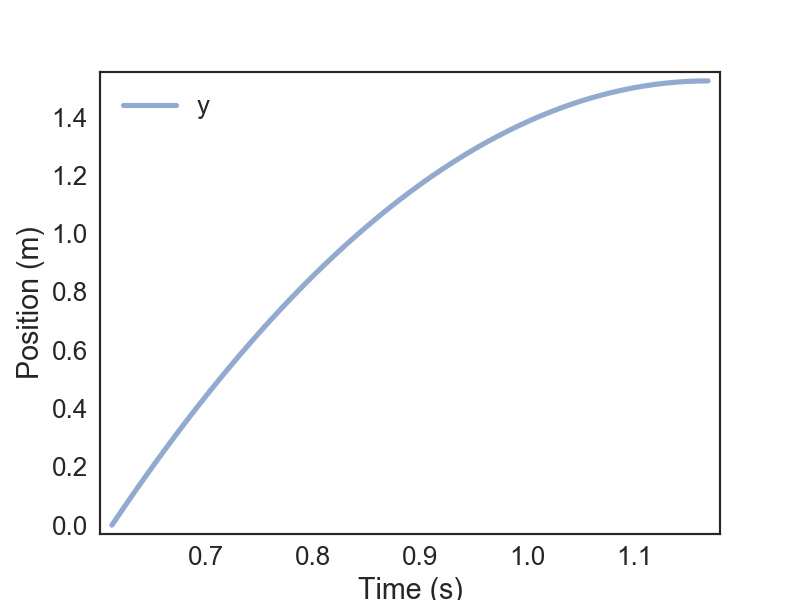

1.0 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468296
0.621575  0.053945  5.370649
0.631528  0.106917  5.273002
0.641482  0.158918  5.175355
0.651436  0.209946  5.077707
0.661390  0.260003  4.980060
0.671344  0.309088  4.882413
0.681298  0.357200  4.784766
0.691251  0.404341  4.687119
0.701205  0.450510  4.589472
0.711159  0.495707  4.491825
0.721113  0.539932  4.394178
0.731067  0.583185  4.296531
0.741021  0.625466  4.198884
0.750974  0.666775  4.101237
0.760928  0.707112  4.003589
0.770882  0.746477  3.905942
0.780836  0.784870  3.808295
0.790790  0.822291  3.710648
0.800744  0.858740  3.613001
0.810697  0.894217  3.515354
0.820651  0.928723  3.417707
0.830605  0.962256  3.320060
0.840559  0.994817  3.222413
0.850513  1.026407  3.124766
0.860467  1.057024  3.027119
0.870420  1.086669  2.929471
0.880374  1.115343  2.831824
0.890328  1.143044  2.734177
0.900282  1.169774  2.636530
0.910236  1.195532  2.538883
0.920190  1.220317  2.441236
0.930143  1.2441

<IPython.core.display.Javascript object>


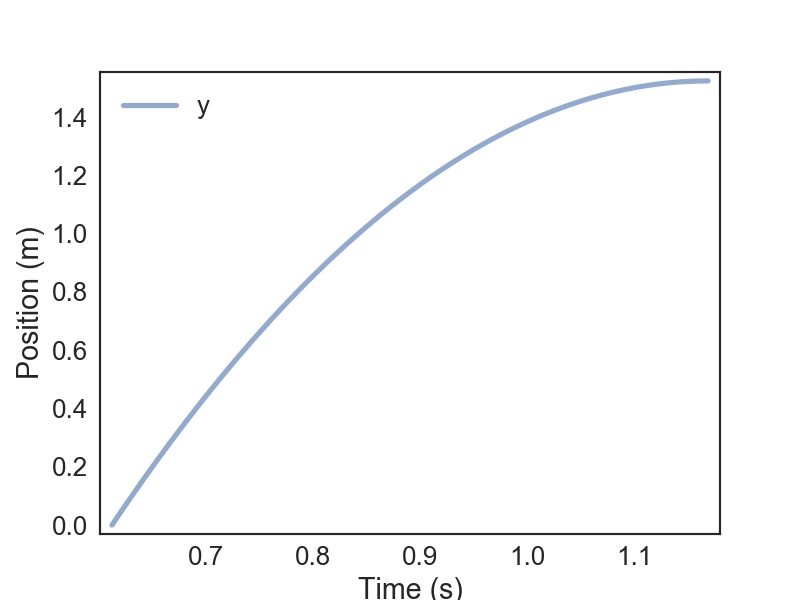

1.1 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468302
0.621575  0.053945  5.370655
0.631528  0.106917  5.273007
0.641482  0.158918  5.175360
0.651436  0.209947  5.077713
0.661390  0.260003  4.980066
0.671344  0.309088  4.882419
0.681298  0.357201  4.784772
0.691251  0.404342  4.687125
0.701205  0.450510  4.589478
0.711159  0.495707  4.491831
0.721113  0.539932  4.394184
0.731067  0.583185  4.296537
0.741021  0.625466  4.198890
0.750974  0.666775  4.101242
0.760928  0.707112  4.003595
0.770882  0.746478  3.905948
0.780836  0.784871  3.808301
0.790790  0.822292  3.710654
0.800744  0.858741  3.613007
0.810697  0.894219  3.515360
0.820651  0.928724  3.417713
0.830605  0.962257  3.320066
0.840559  0.994819  3.222419
0.850513  1.026408  3.124772
0.860467  1.057026  3.027124
0.870420  1.086671  2.929477
0.880374  1.115345  2.831830
0.890328  1.143046  2.734183
0.900282  1.169776  2.636536
0.910236  1.195533  2.538889
0.920190  1.220319  2.441242
0.930143  1.2441

<IPython.core.display.Javascript object>


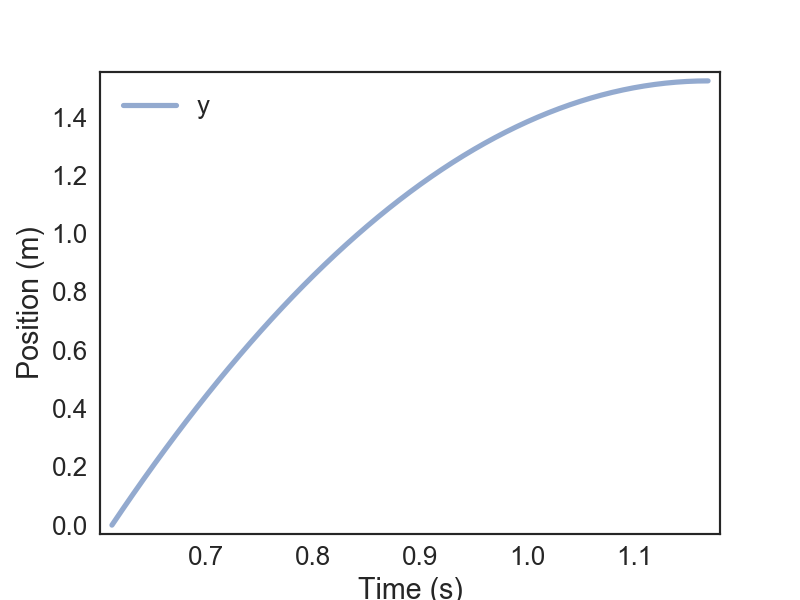

1.2000000000000002 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468308
0.621575  0.053945  5.370660
0.631528  0.106917  5.273013
0.641482  0.158918  5.175366
0.651436  0.209947  5.077719
0.661390  0.260004  4.980072
0.671344  0.309088  4.882425
0.681298  0.357201  4.784778
0.691251  0.404342  4.687131
0.701205  0.450511  4.589484
0.711159  0.495708  4.491837
0.721113  0.539933  4.394190
0.731067  0.583186  4.296542
0.741021  0.625467  4.198895
0.750974  0.666776  4.101248
0.760928  0.707113  4.003601
0.770882  0.746479  3.905954
0.780836  0.784872  3.808307
0.790790  0.822293  3.710660
0.800744  0.858742  3.613013
0.810697  0.894220  3.515366
0.820651  0.928725  3.417719
0.830605  0.962258  3.320072
0.840559  0.994820  3.222425
0.850513  1.026409  3.124777
0.860467  1.057027  3.027130
0.870420  1.086673  2.929483
0.880374  1.115346  2.831836
0.890328  1.143048  2.734189
0.900282  1.169777  2.636542
0.910236  1.195535  2.538895
0.920190  1.220321  2.441248
0

<IPython.core.display.Javascript object>


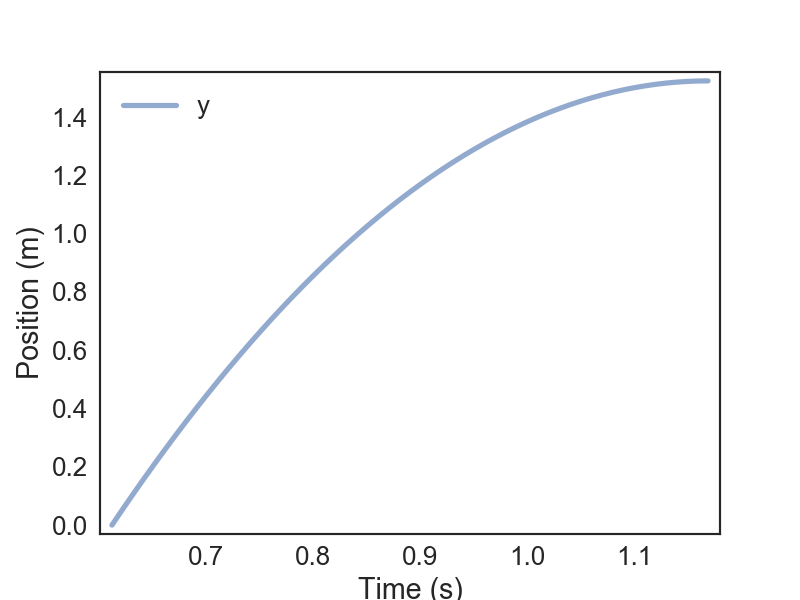

1.3 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468313
0.621575  0.053945  5.370666
0.631528  0.106917  5.273019
0.641482  0.158918  5.175372
0.651436  0.209947  5.077725
0.661390  0.260004  4.980078
0.671344  0.309089  4.882431
0.681298  0.357202  4.784784
0.691251  0.404343  4.687137
0.701205  0.450512  4.589490
0.711159  0.495709  4.491843
0.721113  0.539934  4.394195
0.731067  0.583187  4.296548
0.741021  0.625468  4.198901
0.750974  0.666777  4.101254
0.760928  0.707114  4.003607
0.770882  0.746480  3.905960
0.780836  0.784873  3.808313
0.790790  0.822294  3.710666
0.800744  0.858743  3.613019
0.810697  0.894221  3.515372
0.820651  0.928726  3.417725
0.830605  0.962260  3.320077
0.840559  0.994821  3.222430
0.850513  1.026411  3.124783
0.860467  1.057028  3.027136
0.870420  1.086674  2.929489
0.880374  1.115348  2.831842
0.890328  1.143049  2.734195
0.900282  1.169779  2.636548
0.910236  1.195537  2.538901
0.920190  1.220323  2.441254
0.930143  1.2441

<IPython.core.display.Javascript object>


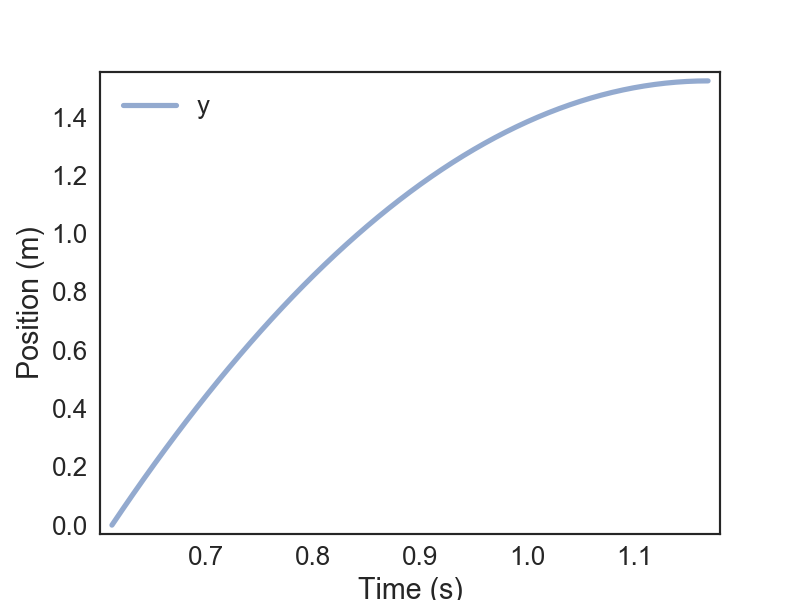

1.4000000000000001 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468319
0.621575  0.053945  5.370672
0.631528  0.106918  5.273025
0.641482  0.158918  5.175378
0.651436  0.209947  5.077731
0.661390  0.260004  4.980084
0.671344  0.309089  4.882437
0.681298  0.357202  4.784790
0.691251  0.404343  4.687143
0.701205  0.450512  4.589496
0.711159  0.495709  4.491848
0.721113  0.539934  4.394201
0.731067  0.583187  4.296554
0.741021  0.625469  4.198907
0.750974  0.666778  4.101260
0.760928  0.707115  4.003613
0.770882  0.746480  3.905966
0.780836  0.784874  3.808319
0.790790  0.822295  3.710672
0.800744  0.858745  3.613025
0.810697  0.894222  3.515378
0.820651  0.928728  3.417730
0.830605  0.962261  3.320083
0.840559  0.994823  3.222436
0.850513  1.026412  3.124789
0.860467  1.057030  3.027142
0.870420  1.086676  2.929495
0.880374  1.115349  2.831848
0.890328  1.143051  2.734201
0.900282  1.169781  2.636554
0.910236  1.195539  2.538907
0.920190  1.220325  2.441260
0

<IPython.core.display.Javascript object>


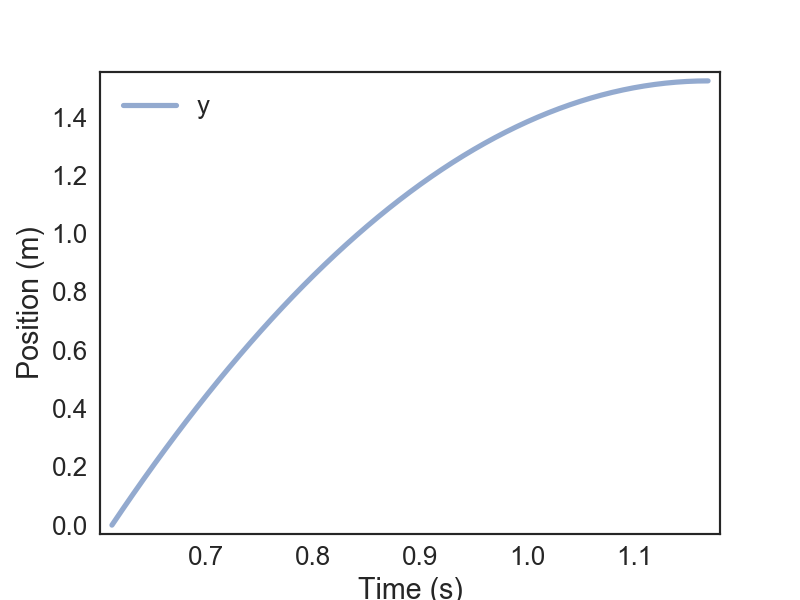

1.5 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468325
0.621575  0.053945  5.370678
0.631528  0.106918  5.273031
0.641482  0.158919  5.175384
0.651436  0.209947  5.077737
0.661390  0.260004  4.980090
0.671344  0.309089  4.882443
0.681298  0.357202  4.784796
0.691251  0.404343  4.687148
0.701205  0.450513  4.589501
0.711159  0.495710  4.491854
0.721113  0.539935  4.394207
0.731067  0.583188  4.296560
0.741021  0.625469  4.198913
0.750974  0.666779  4.101266
0.760928  0.707116  4.003619
0.770882  0.746481  3.905972
0.780836  0.784875  3.808325
0.790790  0.822296  3.710678
0.800744  0.858746  3.613031
0.810697  0.894223  3.515383
0.820651  0.928729  3.417736
0.830605  0.962262  3.320089
0.840559  0.994824  3.222442
0.850513  1.026414  3.124795
0.860467  1.057031  3.027148
0.870420  1.086677  2.929501
0.880374  1.115351  2.831854
0.890328  1.143053  2.734207
0.900282  1.169783  2.636560
0.910236  1.195540  2.538913
0.920190  1.220326  2.441265
0.930143  1.2441

<IPython.core.display.Javascript object>


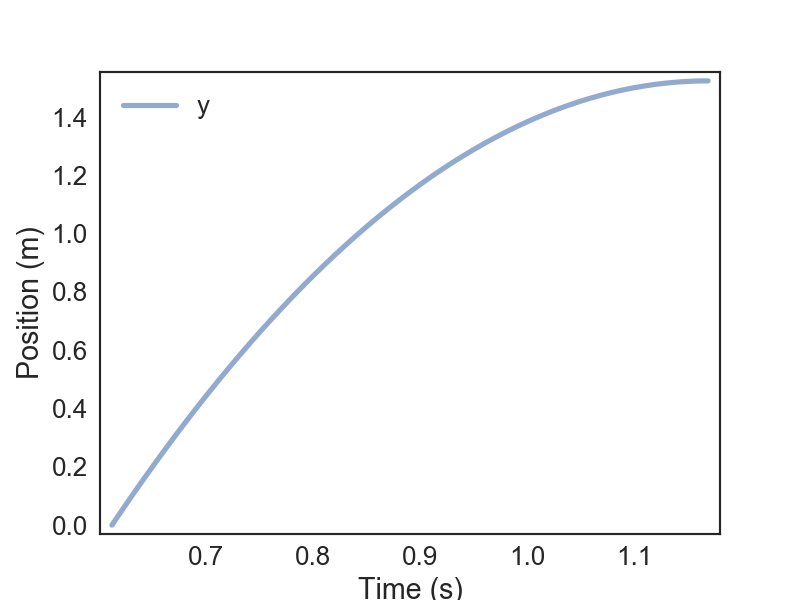

1.6 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468331
0.621575  0.053945  5.370684
0.631528  0.106918  5.273037
0.641482  0.158919  5.175390
0.651436  0.209948  5.077743
0.661390  0.260005  4.980096
0.671344  0.309090  4.882449
0.681298  0.357203  4.784801
0.691251  0.404344  4.687154
0.701205  0.450513  4.589507
0.711159  0.495710  4.491860
0.721113  0.539936  4.394213
0.731067  0.583189  4.296566
0.741021  0.625470  4.198919
0.750974  0.666780  4.101272
0.760928  0.707117  4.003625
0.770882  0.746482  3.905978
0.780836  0.784876  3.808331
0.790790  0.822297  3.710683
0.800744  0.858747  3.613036
0.810697  0.894224  3.515389
0.820651  0.928730  3.417742
0.830605  0.962264  3.320095
0.840559  0.994825  3.222448
0.850513  1.026415  3.124801
0.860467  1.057033  3.027154
0.870420  1.086679  2.929507
0.880374  1.115352  2.831860
0.890328  1.143054  2.734213
0.900282  1.169784  2.636566
0.910236  1.195542  2.538918
0.920190  1.220328  2.441271
0.930143  1.2441

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


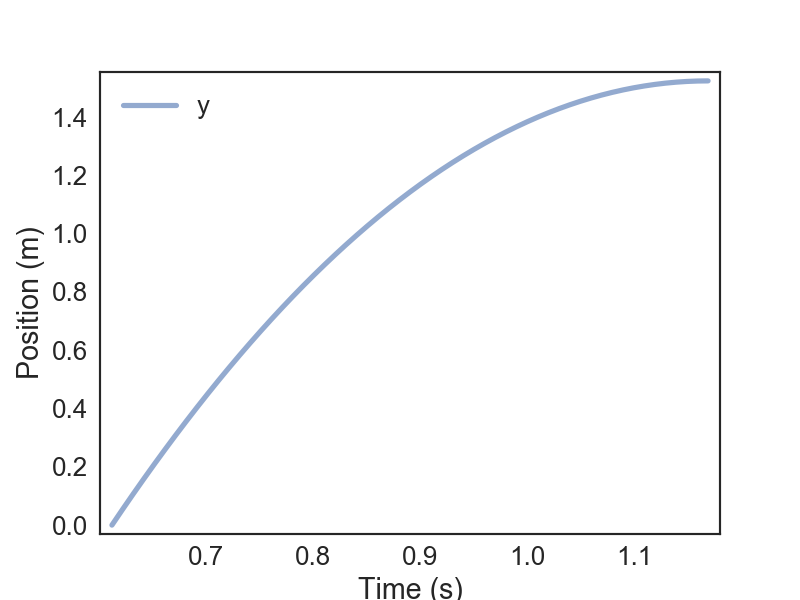

1.7000000000000002 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468337
0.621575  0.053945  5.370690
0.631528  0.106918  5.273043
0.641482  0.158919  5.175396
0.651436  0.209948  5.077749
0.661390  0.260005  4.980102
0.671344  0.309090  4.882454
0.681298  0.357203  4.784807
0.691251  0.404344  4.687160
0.701205  0.450514  4.589513
0.711159  0.495711  4.491866
0.721113  0.539936  4.394219
0.731067  0.583190  4.296572
0.741021  0.625471  4.198925
0.750974  0.666780  4.101278
0.760928  0.707118  4.003631
0.770882  0.746483  3.905984
0.780836  0.784877  3.808336
0.790790  0.822298  3.710689
0.800744  0.858748  3.613042
0.810697  0.894226  3.515395
0.820651  0.928731  3.417748
0.830605  0.962265  3.320101
0.840559  0.994827  3.222454
0.850513  1.026416  3.124807
0.860467  1.057034  3.027160
0.870420  1.086680  2.929513
0.880374  1.115354  2.831866
0.890328  1.143056  2.734219
0.900282  1.169786  2.636571
0.910236  1.195544  2.538924
0.920190  1.220330  2.441277
0

<IPython.core.display.Javascript object>


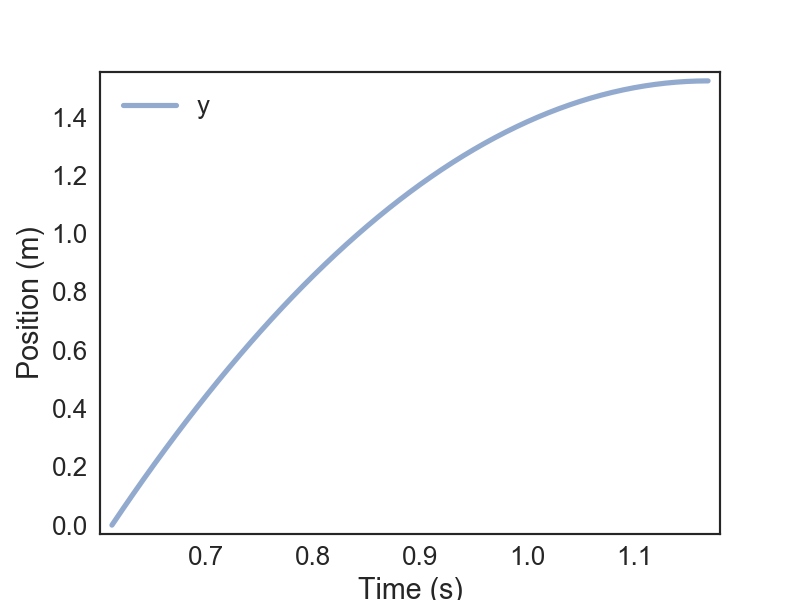

1.8 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468343
0.621575  0.053945  5.370696
0.631528  0.106918  5.273049
0.641482  0.158919  5.175402
0.651436  0.209948  5.077754
0.661390  0.260005  4.980107
0.671344  0.309090  4.882460
0.681298  0.357204  4.784813
0.691251  0.404345  4.687166
0.701205  0.450514  4.589519
0.711159  0.495711  4.491872
0.721113  0.539937  4.394225
0.731067  0.583190  4.296578
0.741021  0.625472  4.198931
0.750974  0.666781  4.101284
0.760928  0.707119  4.003637
0.770882  0.746484  3.905989
0.780836  0.784878  3.808342
0.790790  0.822299  3.710695
0.800744  0.858749  3.613048
0.810697  0.894227  3.515401
0.820651  0.928732  3.417754
0.830605  0.962266  3.320107
0.840559  0.994828  3.222460
0.850513  1.026418  3.124813
0.860467  1.057036  3.027166
0.870420  1.086682  2.929519
0.880374  1.115356  2.831871
0.890328  1.143058  2.734224
0.900282  1.169788  2.636577
0.910236  1.195546  2.538930
0.920190  1.220332  2.441283
0.930143  1.2441

<IPython.core.display.Javascript object>


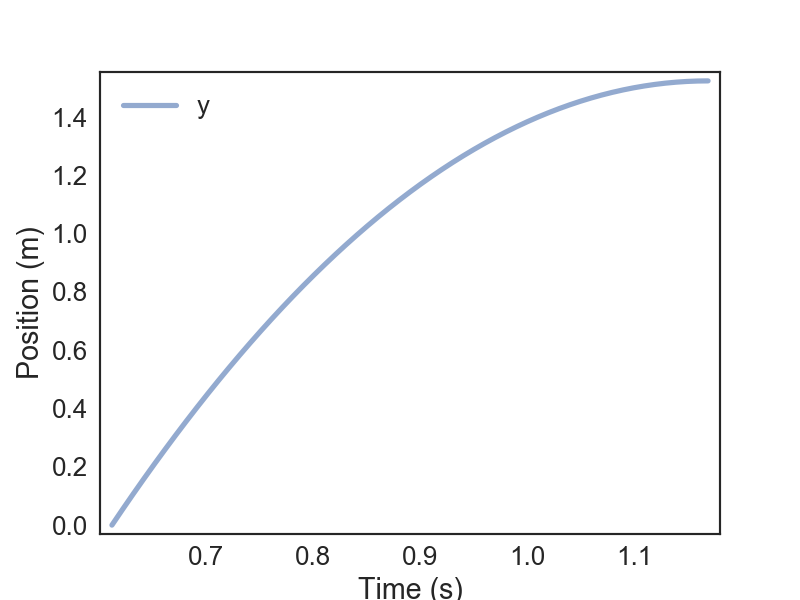

1.9000000000000001 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468349
0.621575  0.053945  5.370702
0.631528  0.106918  5.273055
0.641482  0.158919  5.175407
0.651436  0.209948  5.077760
0.661390  0.260006  4.980113
0.671344  0.309091  4.882466
0.681298  0.357204  4.784819
0.691251  0.404345  4.687172
0.701205  0.450515  4.589525
0.711159  0.495712  4.491878
0.721113  0.539937  4.394231
0.731067  0.583191  4.296584
0.741021  0.625472  4.198937
0.750974  0.666782  4.101290
0.760928  0.707120  4.003642
0.770882  0.746485  3.905995
0.780836  0.784879  3.808348
0.790790  0.822300  3.710701
0.800744  0.858750  3.613054
0.810697  0.894228  3.515407
0.820651  0.928734  3.417760
0.830605  0.962268  3.320113
0.840559  0.994829  3.222466
0.850513  1.026419  3.124819
0.860467  1.057037  3.027172
0.870420  1.086683  2.929524
0.880374  1.115357  2.831877
0.890328  1.143059  2.734230
0.900282  1.169789  2.636583
0.910236  1.195547  2.538936
0.920190  1.220334  2.441289
0

<IPython.core.display.Javascript object>


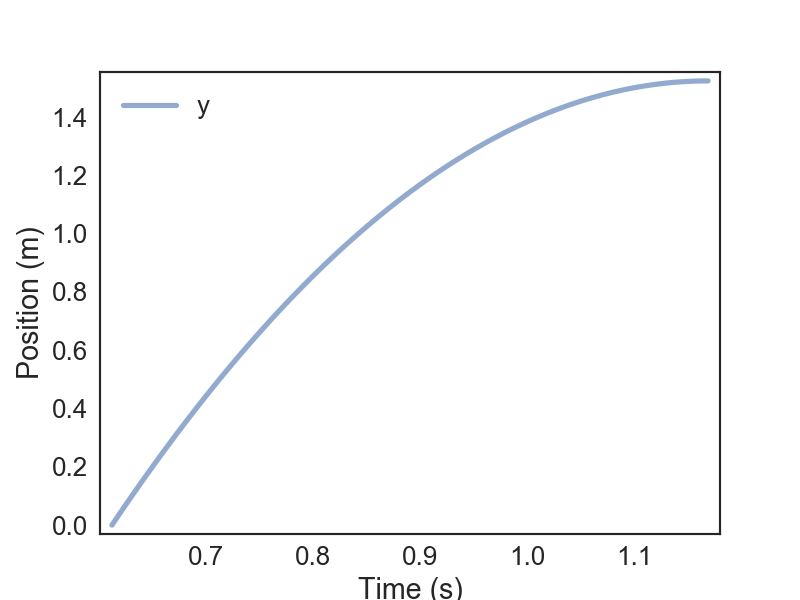

2.0 kilogram / second ** 2                  y         v
0.611621  0.000000  5.468355
0.621575  0.053945  5.370708
0.631528  0.106918  5.273060
0.641482  0.158919  5.175413
0.651436  0.209949  5.077766
0.661390  0.260006  4.980119
0.671344  0.309091  4.882472
0.681298  0.357204  4.784825
0.691251  0.404346  4.687178
0.701205  0.450515  4.589531
0.711159  0.495713  4.491884
0.721113  0.539938  4.394237
0.731067  0.583192  4.296590
0.741021  0.625473  4.198942
0.750974  0.666783  4.101295
0.760928  0.707120  4.003648
0.770882  0.746486  3.906001
0.780836  0.784880  3.808354
0.790790  0.822301  3.710707
0.800744  0.858751  3.613060
0.810697  0.894229  3.515413
0.820651  0.928735  3.417766
0.830605  0.962269  3.320119
0.840559  0.994831  3.222472
0.850513  1.026421  3.124825
0.860467  1.057039  3.027177
0.870420  1.086685  2.929530
0.880374  1.115359  2.831883
0.890328  1.143061  2.734236
0.900282  1.169791  2.636589
0.910236  1.195549  2.538942
0.920190  1.220335  2.441295
0.930143  1.2441

In [38]:
k_values = linspace(0 * kg/s**2, 2 * kg/s**2, 21)
sweep = SweepSeries()

newfig()
for k in k_values:
    x = .2 * m
    leg_PE = 1/2 * k * x**2
    Total_PE = tramp_PE + leg_PE
    v_up = sqrt(2 * Total_PE / mass)
    init_up = State(y = 0 *m,
                    v = v_up)
    duration_up = v_up/g/s + duration
    ts_up = linrange(duration, duration_up, .01)
    system_up = System(init=init_up, g=g, ts=ts)
    slope_func(init_up, 0, system_up)
    run_odeint(system_up, slope_func)
    plot_position(system_up.results)
    print (k, system_up.results)